In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
data = pd.read_csv('livedata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074994 entries, 0 to 1074993
Data columns (total 9 columns):
_id               1074994 non-null object
category_name     1071093 non-null object
room_id           1074994 non-null int64
title             1074994 non-null object
user_id           1074994 non-null int64
user_name         1072123 non-null object
watching_count    1074994 non-null int64
time              1074994 non-null int64
diamonds          245844 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 73.8+ MB


In [4]:
data.sample(5)

,_id,category_name,room_id,title,user_id,user_name,watching_count,time,diamonds
588226,ObjectId(5ccbedfc30e692308104ca48),绝地求生,6686597334966831885,一觉起来开始找回当年的我,51900990808,李韽韽,538,1556868490664,NaN
953711,ObjectId(5ccfb2fe30e6920187e16132),刺激战场,6687734477172542220,刺激战场：刚枪王与路人不回头,102541598619,骚迪老师,7168,1557115585099,NaN
853133,ObjectId(5cceb48530e692747aa3555c),绝地求生,6687401326768376588,绝地求生：50V50 百人团战 嗨起来~,110965908906,Ty丶静哥哥,358,1557050401886,NaN
206362,ObjectId(5cc821ab30e6920470034c5e),迷你世界,6685601769684519694,迷你世界：萌新主播1西瓜加好友。,108716066485,Ty小宇吖,8618,1556619590109,457679.0
146292,ObjectId(5cc7612230e69204700261b8),刺激战场,6685377137316383496,刺激战场：绝地钢枪王 不服就钢枪,5756457336,学徒白大帅,227,1556570375226,NaN


### 数据清洗
1. 数据去重，重新建立主键“id”
2. 把“time”字段转换为datetime类型
3. 选取2019年4月30日0时到2019年5月7日0时的记录

#### 1.数据去重，重新建立主键“id”

In [5]:
data = data[['category_name', 'room_id', 'title', 'user_id', 'user_name',
             'watching_count', 'time', 'diamonds']].drop_duplicates()

In [6]:
data['id'] = list(range(1000000, 2074850))

#### 2. 把“time”字段转换为datetime类型

In [7]:
# data['date_time'] = pd.to_datetime(np.round(data['time']/1000, 0), unit='s', utc=True).dt.tz_convert('Asia/Shanghai')
time_delta = 8*60*60
data['date_time'] = pd.to_datetime(np.round(data['time']/1000 + 28800, 0), unit='s')

In [8]:
data.tail(5)

,category_name,room_id,title,user_id,user_name,watching_count,time,diamonds,id,date_time
1074989,怀旧经典,6687840640782617352,【传奇之路】燕儿带你们占沙城,100586443053,178神途主播燕儿,130,1557195199009,NaN,2074845,2019-05-07 10:13:19
1074990,怀旧经典,6688089561337236236,恒久魔兽世界新开,69474743410,寻觅3611,112,1557195199009,NaN,2074846,2019-05-07 10:13:19
1074991,怀旧经典,6687627433912601358,我W的O青W春,4155791605773675,用户1659494487361,114,1557195199009,NaN,2074847,2019-05-07 10:13:19
1074992,怀旧经典,6686457654125792011,传奇：三职业版本盛大开启 热血混战！！,3170612430508708,传奇林鹿,108,1557195199009,NaN,2074848,2019-05-07 10:13:19
1074993,怀旧经典,6688068573782526734,今天直播夜枫专场,96659222836,凤凰哥游戏解说,109,1557195199009,NaN,2074849,2019-05-07 10:13:19


### 3. 选取2019年4月30日0时到2019年5月7日0时的记录

In [9]:
start_time = pd.to_datetime('2019-04-30 00:00:00')
end_time = pd.to_datetime('2019-05-07 00:00:00')
data = data[(data['date_time']>=start_time) & (data['date_time']<=end_time)]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960932 entries, 86722 to 1047789
Data columns (total 10 columns):
category_name     958137 non-null object
room_id           960932 non-null int64
title             960932 non-null object
user_id           960932 non-null int64
user_name         958460 non-null object
watching_count    960932 non-null int64
time              960932 non-null int64
diamonds          218423 non-null float64
id                960932 non-null int64
date_time         960932 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 80.6+ MB


In [11]:
data.sample(5)

,category_name,room_id,title,user_id,user_name,watching_count,time,diamonds,id,date_time
589155,刺激战场,6686683623280102151,刺激战场：双指阿罪,100510533949,你的阿罪哥哥,1492,1556868790755,NaN,1589105,2019-05-03 15:33:11
346630,热门手游,6685996326754323204,【逃跑吧少年】什么标题能骗你进来,62193996372,沃克光阴老友,419,1556705660389,NaN,1346613,2019-05-01 18:14:20
775824,英雄联盟,6687085826825882381,英雄联盟: 一个没有感情的杀手！！！,95597640509,Dae丶晴天,1233,1556982167853,NaN,1775732,2019-05-04 23:02:48
400483,穿越火线,6686075334254955278,穿越火线：小仙女带你排位上分,105206004942,久儿丶,982,1556728548039,579.0,1400466,2019-05-02 00:35:48
1016526,怀旧经典,6687881593685674764,先来大航海4威力加强,92950125008,那一瞬的温柔4,193,1557144694049,NaN,2016382,2019-05-06 20:11:34


In [12]:
data_steamer = data[['user_id', 'user_name', 'category_name']].drop_duplicates(subset='user_id')
data_steamer.to_csv('steamer.csv', index=False)

In [13]:
data_steamer_info = pd.read_csv('steamerInfo.csv')
data_steamer = data_steamer.merge(data_steamer_info, on='user_id')

### 问题：
一、从主播的角度
1. 收入最高的一批主播营收如何？
2. 所有主播的营收状况如何？
3. 平台聚集了多少粉丝超过百万的主播？
4. 主播们的辛苦程度如何？

二、从平台的角度
4. 平台的营收如何？
5. 平台7天的观众人数趋势如何？
6. 哪款游戏最受欢迎？
7. 哪款游戏最吸金？

三、细化到某一主播的角度
8. 主播一晚的打赏状况如何？
9. 主播的弹幕舆论如何？

#### 1. 收入最高的一批主播营收如何？

In [14]:
# 历史营收Top10
data_income_history = data.groupby('user_id')['diamonds'].max().reset_index(name='history_income')

In [15]:
data_steamer = data_steamer.merge(data_income_history, on='user_id')
data_steamer.head(5)

,user_id,user_name,category_name,username,following,follower,description,auth,history_income
0,109055578925,聆听丶玉晟,英雄联盟,聆听丶玉晟,15,44324,我是小太阳，满满正能量！wx:ltys99999,聆听传媒公司签约主播,339489.0
1,76356861823,混子zz,英雄联盟,混子zz,16,43486,哪有什么岁月静好，不过是有人替你负重前行。,退役军人 游戏领域创作者,243001.0
2,96956845230,兔子解说,英雄联盟,兔子解说,28,133432,国服第一恶魔小丑，第五人格屠神兔子,优质游戏领域创作者,74474.0
3,104598361016,喵游仙Q,英雄联盟,喵游仙Q,20,23952,感谢大家来到仙Q直播间，希望未来的路上，我们都互相陪伴！,NaN,364761.0
4,69442746611,中娱凉心,英雄联盟,中娱凉心,1,48281,性感主播，在线开挂秒人，直播时间19点到猝死,NaN,334499.0


In [16]:
data_steamer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 9 columns):
user_id           4601 non-null int64
user_name         4601 non-null object
category_name     4594 non-null object
username          4601 non-null object
following         4601 non-null int64
follower          4601 non-null int64
description       4601 non-null object
auth              1350 non-null object
history_income    3266 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 359.5+ KB


In [17]:
data_steamer['his_income_rmb'] = np.round(data_steamer['history_income']/7, 1)

In [18]:
steamer_income_Top10 = data_steamer.sort_values(by='his_income_rmb', ascending=False).head(10)

In [223]:
from pyecharts import Bar

bar = Bar("历史总打赏收入前10的游戏主播", "截止日期:2019年5月7日0时, 单位:万元", width=800)
bar.add("", steamer_income_Top10['user_name'].values, 
        np.round(steamer_income_Top10['his_income_rmb'].values/10000, 1), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [20]:
# 总营收大于10万的游戏主播有多少人？
data_steamer[data_steamer['his_income_rmb'] > 100000].shape[0]

177

In [21]:
# 7天平均日营收Top10
data_income_7days = np.round((data.groupby('user_id')['diamonds'].max()-
                     data.groupby('user_id')['diamonds'].min())/7/7, 1).reset_index(name='income_7days_rmb')

In [22]:
data_steamer = data_steamer.merge(data_income_7days, on='user_id')
data_steamer.head()

,user_id,user_name,category_name,username,following,follower,description,auth,history_income,his_income_rmb,income_7days_rmb
0,109055578925,聆听丶玉晟,英雄联盟,聆听丶玉晟,15,44324,我是小太阳，满满正能量！wx:ltys99999,聆听传媒公司签约主播,339489.0,48498.4,830.1
1,76356861823,混子zz,英雄联盟,混子zz,16,43486,哪有什么岁月静好，不过是有人替你负重前行。,退役军人 游戏领域创作者,243001.0,34714.4,163.8
2,96956845230,兔子解说,英雄联盟,兔子解说,28,133432,国服第一恶魔小丑，第五人格屠神兔子,优质游戏领域创作者,74474.0,10639.1,72.4
3,104598361016,喵游仙Q,英雄联盟,喵游仙Q,20,23952,感谢大家来到仙Q直播间，希望未来的路上，我们都互相陪伴！,NaN,364761.0,52108.7,290.2
4,69442746611,中娱凉心,英雄联盟,中娱凉心,1,48281,性感主播，在线开挂秒人，直播时间19点到猝死,NaN,334499.0,47785.6,79.5


In [23]:
steamer_income_1day_Top10 = data_steamer.sort_values(by='income_7days_rmb', ascending=False).head(10)

In [227]:
np.round(steamer_income_1day_Top10['income_7days_rmb'].values/10000, 1)[1:].mean()

1.0666666666666667

In [224]:
bar = Bar("单日平均打赏收入前10的游戏主播", "时间:2019年4月30日0时至5月7日0时, 单位:万元", width=800)
bar.add("", steamer_income_1day_Top10['user_name'].values, 
        np.round(steamer_income_1day_Top10['income_7days_rmb'].values/10000, 1), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 2. 所有主播的营收状况如何？

In [228]:
labels = ['一百元以内', '一百到一千元', '一千到一万元', '一万到十万元', 
          '十万到一百万元', '一百万元到一千万元', '一千万元以上']
cut_intervals = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [26]:
data_steamer['income_bin'] = pd.cut(data_steamer['his_income_rmb'], cut_intervals,labels=labels, retbins=True, right=False)[0]

In [27]:
income_status = data_steamer['income_bin'].value_counts()
income_status

一百元以内        1143
一千到一万元        787
一万到十万元        598
一百到一千元        561
十万到一百万元       167
一百万元到一千万元       9
一千万元以上          1
Name: income_bin, dtype: int64

In [28]:
income_status.sum()

3266

In [230]:
data_steamer.shape[0]

4601

In [231]:
4601-3266

1335

In [232]:
income_status/income_status.sum()

一百元以内        0.349969
一千到一万元       0.240968
一万到十万元       0.183099
一百到一千元       0.171770
十万到一百万元      0.051133
一百万元到一千万元    0.002756
一千万元以上       0.000306
Name: income_bin, dtype: float64

In [233]:
1143+561+787

2491

In [234]:
2491/3266

0.7627066748315983

In [235]:
177/3226

0.05486670799752015

In [229]:
from pyecharts import Line, Overlap

bar = Bar("游戏主播打赏收入状况人数分布图", "截止日期:2019年5月7日0时, 主播数:3266, 单位:人", width=600)
bar.add("", labels, [1143, 561, 787, 598, 167, 9, 1],
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", labels, np.array([1143, 561, 787, 598, 167, 9, 1])+10)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 3. 平台聚集了多少粉丝超过百万的主播？

In [247]:
steamer_info = pd.read_csv('steamerInfo.csv')
steamer_info.sample(5)

million_follower = steamer_info[steamer_info['follower']>1000000]
print('平台聚集了{}个粉丝数超百万的主播！'.format(million_follower.shape[0]))

平台聚集了56个粉丝数超百万的主播！


In [117]:
steamer_info.loc[steamer_info['follower']>100000, 'auth'].shape[0]

277

In [115]:
steamer_info.loc[steamer_info['follower']>100000, 'auth'].notnull().sum()

252

In [249]:
auth = steamer_info.iloc[list(steamer_info['follower'].nlargest(200).index)]['auth'].value_counts()

In [252]:
auth[auth.index.str.contains('游戏达人团')]

游戏达人团成员 优质游戏领域创作者           28
游戏达人团成员 知名游戏领域创作者           25
游戏达人团成员 主机单机主播 优质游戏领域创作者     1
游戏达人团成员 迷你世界主播 优质游戏领域创作者     1
Name: auth, dtype: int64

In [105]:
labels = ['一百以内', '一百到一千', '一千到一万', '一万到十万', 
          '十万到一百万', '一百万以上']
cut_intervals = [0, 100, 1000, 10000, 100000, 1000000, 10000000]

In [106]:
steamer_info.sample()

,user_id,username,following,follower,description,auth
846,70295810947,橙小兮汉汁i,6,663,刺激战场三指操作★狙击手橙小兮 西瓜新主播小改改～与世无争,NaN


In [107]:
steamer_info['follower_bin'] = pd.cut(steamer_info['follower'], cut_intervals,labels=labels, retbins=True, right=False)[0]

In [108]:
steamer_info['follower_bin'].value_counts()

一百以内      1536
一千到一万     1145
一百到一千     1075
一万到十万      568
十万到一百万     221
一百万以上       56
Name: follower_bin, dtype: int64

In [112]:
bar = Bar("游戏主播粉丝数分布图", "截止日期:2019年5月7日0时, 单位:人", width=600)
bar.add("", labels, [1536, 1075, 1145, 568, 221, 56],
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", labels, np.array([1536, 1075, 1145, 568, 221, 56])+20)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 4. 主播们的辛苦程度如何？

In [32]:
def get_interval(time_data):
    return time_data.sort_values().diff()[-(time_data.sort_values().diff() > pd.Timedelta('0 days 01:00:00'))].sum()

In [33]:
interval = data.groupby('user_id')['date_time'].apply(get_interval).reset_index(name='interval')

In [34]:
data_steamer = data_steamer.merge(interval, on='user_id')
data_steamer.head(5)

,user_id,user_name,category_name,username,following,follower,description,auth,history_income,his_income_rmb,income_7days_rmb,income_bin,interval
0,109055578925,聆听丶玉晟,英雄联盟,聆听丶玉晟,15,44324,我是小太阳，满满正能量！wx:ltys99999,聆听传媒公司签约主播,339489.0,48498.4,830.1,一万到十万元,1 days 06:54:02
1,76356861823,混子zz,英雄联盟,混子zz,16,43486,哪有什么岁月静好，不过是有人替你负重前行。,退役军人 游戏领域创作者,243001.0,34714.4,163.8,一万到十万元,2 days 01:02:07
2,96956845230,兔子解说,英雄联盟,兔子解说,28,133432,国服第一恶魔小丑，第五人格屠神兔子,优质游戏领域创作者,74474.0,10639.1,72.4,一万到十万元,2 days 21:26:00
3,104598361016,喵游仙Q,英雄联盟,喵游仙Q,20,23952,感谢大家来到仙Q直播间，希望未来的路上，我们都互相陪伴！,NaN,364761.0,52108.7,290.2,一万到十万元,1 days 05:00:28
4,69442746611,中娱凉心,英雄联盟,中娱凉心,1,48281,性感主播，在线开挂秒人，直播时间19点到猝死,NaN,334499.0,47785.6,79.5,一万到十万元,1 days 04:45:48


In [35]:
def get_hour_1day(itv):
    days = itv.days
    hours = itv.seconds/3600
    return np.round((days*24 + hours)/7, 1)

In [36]:
data_steamer['hour_per_day'] = data_steamer['interval'].apply(get_hour_1day)

In [37]:
Top10_income_hour = data_steamer.loc[data_steamer['user_name'].isin(steamer_income_1day_Top10['user_name'].values), 
                                    ['user_name', 'hour_per_day', 'income_7days_rmb']].sort_values(by='income_7days_rmb', ascending=False)

In [38]:
Top10_income_hour

,user_name,hour_per_day,income_7days_rmb
934,Dae小川,8.0,145187.6
3556,小竹老师skr,3.1,22703.5
1635,麦兜解说,10.3,12340.2
1714,汤米Teacher,4.4,12278.5
278,A扬游戏大神,8.9,9176.1
2150,羽毛不飘才怪,5.2,8970.6
1322,刺激战场Dae路白,6.1,8893.7
276,青柚,6.3,8732.5
1054,刺激战场Dae阿布,7.2,6856.6
1074,正经的酒肉美人呦,6.3,6450.2


In [239]:
bar = Bar("单日平均打赏收入前10的游戏主播日平均直播时长", "时间:2019年4月30日0时至5月7日0时, 单位:小时", width=800)
bar.add("", Top10_income_hour['user_name'].values, 
        Top10_income_hour['hour_per_day'].values, 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [40]:
Top10_his_income_hour = data_steamer.loc[data_steamer['user_name'].isin(steamer_income_Top10['user_name'].values), 
                                    ['user_name', 'hour_per_day', 'his_income_rmb']].sort_values(by='his_income_rmb', ascending=False)

In [41]:
Top10_his_income_hour

,user_name,hour_per_day,his_income_rmb
1934,陈大白游戏解说,4.3,12802891.6
273,大奇游戏解说,7.9,5445611.4
1054,刺激战场Dae阿布,7.2,5210848.1
1714,汤米Teacher,4.4,3649125.6
2023,正经的江叔,4.8,3634273.4
276,青柚,6.3,2878809.3
274,九酱扬子,7.5,1981715.6
537,sy天心,2.3,1184297.7
3423,三姨太游戏视频,2.5,1150586.1
934,Dae小川,8.0,1016313.1


In [42]:
bar = Bar("历史总营收前10的游戏主播日平均直播时长", "时间:2019年4月30日0时至5月7日0时, 单位:小时", width=800)
bar.add("", Top10_his_income_hour['user_name'].values, 
        Top10_his_income_hour['hour_per_day'].values, 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [43]:
data_steamer.loc[data_steamer['income_7days_rmb'] >=2000, 'hour_per_day'].shape

(51,)

In [44]:
data_steamer.loc[data_steamer['income_7days_rmb'] >=2000, 'hour_per_day'].mean()

6.347058823529411

日平均收入2000元以上的主播（也是月营收6万），日平均直播时长是6.34小时。

In [241]:
income_bin_hour = np.round(data_steamer.groupby('income_bin')['hour_per_day'].mean(),1)

In [246]:
bar = Bar("各收入区间的游戏主播日平均直播时长", "时间:2019年4月30日0时至5月7日0时, 单位:小时", width=600)
bar.add("", income_bin_hour.index, income_bin_hour.values,
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", income_bin_hour.index, income_bin_hour.values+0.1)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 5. 平台的营收如何？

In [45]:
data_steamer.sample()

,user_id,user_name,category_name,username,following,follower,description,auth,history_income,his_income_rmb,income_7days_rmb,income_bin,interval,hour_per_day
3016,51729908755,千年的王八万年的龟,穿越火线,千年的王八万年的龟,59,1227026,幽默与专业并存，做一位有态度的游戏解说。 麻木，泷战的好基友,游戏达人团成员 优质游戏领域创作者,1672732.0,238961.7,312.9,十万到一百万元,09:14:35,1.3


In [46]:
# 历史打赏总营收
data_steamer['his_income_rmb'].sum()

110129953.4

In [47]:
# 七天总营收
data_steamer['income_7days_rmb'].sum()*7

4913348.299999999

In [253]:
4913348/7*365/1000000

256.19600285714284

In [48]:
data['date'] = data['date_time'].dt.date

In [49]:
# 这里太长了，需要解释一下：根据日期和user_id分组，求出每天每个主播的营收，再以日期分组求总和，
# 除以7（1块钱=7钻石），除以10000（以万元为单位）
income_per_day = np.round((data.groupby(['date', 'user_id'])['diamonds'].max() - 
                           data.groupby(['date', 'user_id'])['diamonds'].min()).groupby(level=0).sum()/7/10000, 0)

In [50]:
# 另外，解释一下为什么这里的总数跟上面的总营收对不上：
# 因为西瓜视频数据的返回机制，每位主播每个时间采集点的钻石数采集是随机的，有时候可以采集到，有时候不能
# 所以造成了钻石数的不连续性，导致我们只能得到大致的数据（低于实际的，但是差不太远）
# 这里按照日期分组之后，又会缩短可以统计的时间，所以跟上面的总营收对不上
income_per_day.sum()

468.0

In [51]:
# 我们把缺了的23万进行平均补足
add_num = round((491-468)/7, 0)

In [52]:
bar = Bar("西瓜视频游戏直播平台日打赏营收", "时间:2019年4月30日至5月6日, 单位:万元", width=600)
bar.add("", income_per_day.index, income_per_day.values+add_num,
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)

line = Line(width=600)
line.add("", income_per_day.index, income_per_day.values+add_num+3)
overlap = Overlap(width=600)
overlap.add(bar)
overlap.add(line)

overlap

#### 6. 平台7天的观众人数趋势如何？

In [53]:
watching_count = data.groupby('date_time')['watching_count'].sum()
watching_count = watching_count.resample('3600S', label='right').max()
watching_count = watching_count[watching_count.notnull()]

In [54]:
line = Line("西瓜视频游戏直播观看人数", "时间:2019年4月30日至5月6日, 单位:万人", width=1100)
line.add("", watching_count.index, watching_count/10000, is_smooth=True, 
             legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8)
line

In [55]:
watching_count = data.groupby('date_time')['watching_count'].sum()
watching_count = watching_count.resample('10800S', label='right').max()
watching_count = watching_count[watching_count.notnull()]

In [56]:
watching_count = watching_count.reset_index(name='watching_count')

In [57]:
watching_count['date'] = watching_count['date_time'].dt.date
watching_count['date'] = watching_count['date'].astype(str)
watching_count['date'] = ['2019-04-30'] + list(watching_count['date'])[:-1]

In [58]:
time_str = [str(i)+'时' for i in range(0, 24, 3)]
time_str

['0时', '3时', '6时', '9时', '12时', '15时', '18时', '21时']

In [59]:
line = Line("西瓜视频游戏直播日观看人数(时间:4月30日至5月6日, 单位:万人)", width=600, height=400)
for d in watching_count['date'].unique():
    date_data = watching_count[watching_count['date'] == d]
    line.add(d.replace('2019-', ''), time_str, date_data['watching_count'].values/10000, is_smooth=True,
             legend_text_size=15,xaxis_label_textsize=20,
             yaxis_label_textsize=18,legend_top=30)
line

#### 7. 哪款游戏最受欢迎？

In [60]:
data.sample()

,category_name,room_id,title,user_id,user_name,watching_count,time,diamonds,id,date_time,date
890242,棋牌游戏,6687489669250370315,萌妹子斗地主 声音甜美等你来围观,97108699433,喵喵斗地主,16095,1557062105354,NaN,1890099,2019-05-05 21:15:05,2019-05-05


In [61]:
ppl_game_top10 = data.groupby(['category_name', 'date_time'])['watching_count'].sum().groupby(level=0).mean().nlargest(10)

In [71]:
bar = Bar("最受观众欢迎的直播游戏", "单位:万人", width=800)
bar.add("", ppl_game_top10.index, 
        np.round(ppl_game_top10.values/10000, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [72]:
ppl_game = data.groupby('category_name')['user_id'].apply(lambda x: len(x.unique())).nlargest(10)

In [74]:
bar = Bar("最受主播欢迎的直播游戏", "单位:人", width=800)
bar.add("", ppl_game.index, 
        np.round(ppl_game.values, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 8. 哪款游戏最吸金？

In [80]:
data_steamer.sample()

,user_id,user_name,category_name,username,following,follower,description,auth,history_income,his_income_rmb,income_7days_rmb,income_bin,interval,hour_per_day
2646,83746283594,龙凤总呈祥正能量,刺激战场,龙凤总呈祥正能量,3422,3719,世界如此险恶，你要内心强大，男人的伎俩女人的道行，来品茶！,NaN,1323.0,189.0,2.3,一百到一千元,21:27:13,3.1


In [85]:
high_game = data_steamer.groupby('category_name')['his_income_rmb'].sum().nlargest(10)

In [257]:
54130000/high_game.sum()

0.5348195529696587

In [87]:
bar = Bar("最吸金的直播游戏", "单位:万元", width=800)
bar.add("", high_game.index, 
        np.round(high_game.values/10000, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#FB1951'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

In [88]:
low_game = data_steamer.groupby('category_name')['his_income_rmb'].sum().nsmallest(0)

In [90]:
bar = Bar("最不吸金的直播游戏", "单位:元", width=800)
bar.add("", low_game.index, 
        np.round(low_game.values, 0), 
        is_stack=True, is_label_show=True, bar_category_gap='40%', 
       label_color = ['#34495e'], label_text_size=18,mark_line=["average"],
       legend_text_size=18,xaxis_label_textsize=16,yaxis_label_textsize=18, xaxis_rotate=20)
bar

#### 9. 主播一晚的打赏状况如何？

In [131]:
from pymongo import MongoClient
from pandas.io.json import json_normalize

In [132]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('XiGua')  

col = db.get_collection('laosiji') # 连接到集合ticket
mon_data = col.find()  # 查询这个集合下的所有记录

data_lsj = json_normalize([rec for rec in mon_data])

In [133]:
data_lsj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40885 entries, 0 to 40884
Data columns (total 67 columns):
CreateTime                                     40885 non-null object
Method                                         40885 non-null object
Monitor                                        40885 non-null int64
Msg                                            0 non-null float64
Msg.action                                     1293 non-null float64
Msg.content                                    10226 non-null object
Msg.device_id                                  1292 non-null object
Msg.digg_info.describe                         3843 non-null object
Msg.digg_info.digg_count                       3843 non-null float64
Msg.digg_info.digg_type                        3843 non-null float64
Msg.digg_info.duration                         3843 non-null float64
Msg.digg_info.event_time                       3843 non-null float64
Msg.digg_info.is_fake_user                     3843 non-null object
M

In [134]:
data_lsj['Method'].unique()

array(['VideoLivePresentMessage', 'VideoLiveChatMessage',
       'VideoLiveDiggMessage', 'VideoLivePresentEndTipMessage', '',
       'VideoLiveMemberMessage', 'VideoLiveRoomAdMessage',
       'VideoLiveJoinDiscipulusMessage', 'VideoLiveSocialMessage',
       'VideoLiveDanmakuMessage', 'VideoLiveControlMessage'], dtype=object)

In [136]:
data_lsj = data_lsj[['MsgID', 'Method', 'CreateTime', 'Msg.content', 'Msg.present_info.fan_piao',
                    'Msg.present_info.watermelon', 'Msg.user.name']]

In [143]:
data_lsj.sample(5)

,MsgID,Method,CreateTime,Msg.content,Msg.present_info.fan_piao,Msg.present_info.watermelon,Msg.user.name
14201,6680875202568506120,VideoLivePresentMessage,1555513089567,NaN,3280738.0,6136037.0,巴黎街头浪子
20854,6680885541006789389,VideoLiveChatMessage,1555514881493181203,不要激动,NaN,NaN,木子狇
12416,6680876293774478088,VideoLiveChatMessage,1555512728501777280,🍄🍄🍄🍄🍄💐💐,NaN,NaN,胡哥
6154,6680871113440021255,VideoLiveChatMessage,1555511521944465490,别说了，伤自尊了,NaN,NaN,大斌子410
6754,6680871044494068494,VideoLivePresentMessage,1555511599587,NaN,3277306.0,6129890.0,葉子葉子叶子吖


In [166]:
data_lsj.drop_duplicates(subset='MsgID', inplace=True)

In [167]:
def get_time(t):
    if t > 155551308956700:
        return t/1000000
    else:
        return t

In [168]:
data_lsj['CreateTime'] = data_lsj['CreateTime'].astype(int)
data_lsj['CreateTime'] = data_lsj['CreateTime'].apply(get_time)
data_lsj['date_time'] = pd.to_datetime(np.round(data_lsj['CreateTime']/1000 + 28800, 0), unit='s')

In [169]:
data_lsj['date_time'].nsmallest(2)

13   1970-01-01 08:00:00
0    2019-04-17 22:09:50
Name: date_time, dtype: datetime64[ns]

In [170]:
data_lsj['date_time'].max()

Timestamp('2019-04-18 01:14:06')

In [175]:
data_lsj['date_time'].max() - data_lsj['date_time'].nsmallest(2)[0]

Timedelta('0 days 03:04:16')

In [171]:
# 一晚直播的钻石数
data_lsj['Msg.present_info.fan_piao'].max() - data_lsj['Msg.present_info.fan_piao'].min()

24406.0

In [172]:
# 一晚直播的收入
24406.0/7

3486.5714285714284

In [258]:
3486*30

104580

In [173]:
# 一晚直播收获的西瓜数
data_lsj['Msg.present_info.watermelon'].max() - data_lsj['Msg.present_info.watermelon'].min()

31676.0

In [176]:
# 一晚直播的弹幕数
data_lsj[data_lsj['Msg.content'].notnull()].shape[0]

10226

In [178]:
# 一秒一条评论
10226/3/60/60

0.9468518518518518

In [185]:
data_lsj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40885 entries, 0 to 40884
Data columns (total 8 columns):
MsgID                          40885 non-null object
Method                         40885 non-null object
CreateTime                     40885 non-null int64
Msg.content                    10226 non-null object
Msg.present_info.fan_piao      24600 non-null float64
Msg.present_info.watermelon    24600 non-null float64
Msg.user.name                  40812 non-null object
date_time                      40885 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [186]:
fan_piao = data_lsj[(data_lsj['Msg.present_info.fan_piao'].notnull())]

In [197]:
line = Line("某主播钻石总数时间变化图", "时间:2019年4月17日22时至18日01时, 单位:万", width=600)
line.add("", fan_piao['date_time'], 
         fan_piao['Msg.present_info.fan_piao']/10000, is_smooth=True, 
             legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=327)
line

#### 10. 主播的弹幕舆论如何？

In [198]:
from snownlp import SnowNLP


def get_sent_snownlp(data):
    s = SnowNLP(data)
    return s.sentiments

In [208]:
data_lsj_comment = data_lsj[(data_lsj['Msg.content'].notnull())&
                            (data_lsj['Msg.content'] != '')]
data_lsj_comment['sent'] = data_lsj_comment['Msg.content'].apply(get_sent_snownlp)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
data_lsj_comment['sent'].mean()

0.5101700215153961

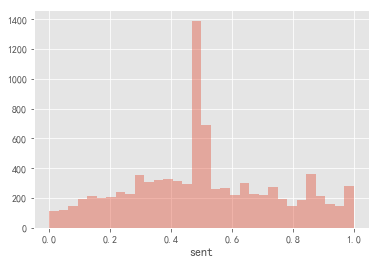

In [217]:
sns.distplot(data_lsj_comment['sent'], kde=False)

In [219]:
# 弹幕评论的词云图
import jieba
from collections import Counter
from pyecharts import WordCloud


swords = [x.strip() for x in open ('stopwords.txt')]

In [220]:
def plot_word_cloud(data, swords):
    text = ''.join(data)
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [222]:
plot_word_cloud(data_lsj_comment['Msg.content'], swords=swords)